In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1.

- 1 拿到老师给定的图片：week1/week1_homework.png。
- 2 对图片进行滤波操作。参考week1/week1_class_code_after_class.py
- 3 修改滤波核的数值和滤波核的大小，调整出最好的效果。

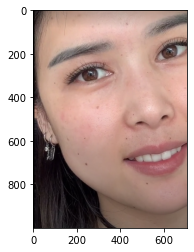

In [66]:
img = cv2.imread("week1_homework.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

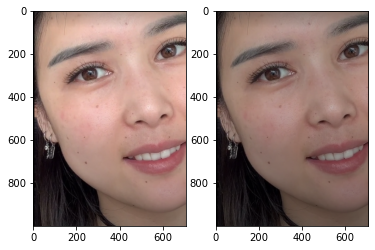

In [45]:
kernel2 = np.array([-0.03,-0.03,-0.03,-0.03,1,-0.03,-0.03,-0.03,-0.03,]).reshape(3, 3)

result2 = cv2.filter2D(img_rgb, -1, kernel2)

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(result2)


In [23]:
plt.subplot?

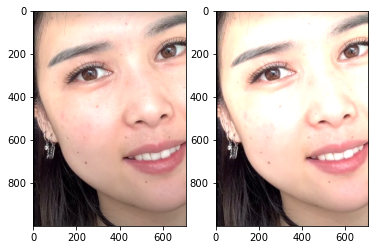

In [43]:
kernel1 = np.array([0.03,0.03,0.03,0.03,1,0.03,0.03,0.03,0.03]).reshape(3, 3)

result1 = cv2.filter2D(img_rgb, -1, kernel1)

kernel2 = np.ones((5, 5))
kernel2 *= 0.02
kernel2[2,2] = 1

result2 = cv2.filter2D(img_rgb, -1, kernel2)

plt.subplot(1, 2, 1)
plt.imshow(result1)
plt.subplot(1, 2, 2)
plt.imshow(result2)

# cv2.imshow("kernle", result2)
# cv2.waitKey (0)

## 2.制作自己的logo水印的照片

(294, 356, 3)


(40, 200)

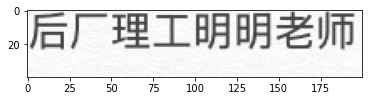

In [46]:
logo_class = cv2.imread("water1.png")
# lena = cv2.imread("lena.jpg")
# plt.imshow(logo_class)
print(logo_class.shape)
# print(lena.shape)
plt.imshow(logo_class[245:285,130:330])
(285-245, 330-130)

True

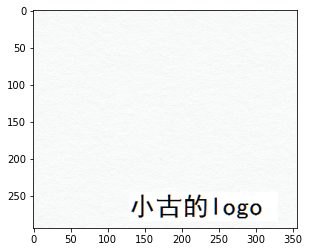

In [59]:
logo = cv2.imread("logo1.jpg")
# plt.imshow(logo)
# print(logo.shape)
# print(img_bilateral.shape)
plt.imshow(logo[170:210,285:485])
(210-170, 485-285)

logo_class[245:285,130:330] = logo[170:210,285:485]
plt.imshow(logo_class)
cv2.imwrite("xiaogu_logo.jpg", logo_class)

## 3.给滤除了噪声的照片加水印(加上了水印，但是原图片明显也变白了（用的老师的水印照片的背景图也没效果）（由于水印图片的大片背景色）)

In [64]:
cv2.resize?

(1000, 707, 3)


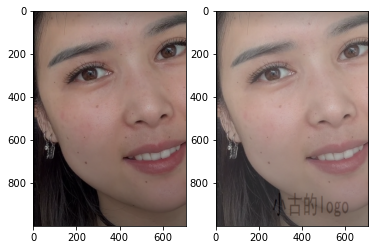

In [67]:
print(result2.shape)

wm = cv2.resize(logo_class, (707, 1000))
wm = cv2.cvtColor(wm, cv2.COLOR_BGR2RGB)
# wm = 255 - wm  # 字体为白背景为黑

plt.subplot(1, 2, 1)
plt.imshow(result2)

img_addwater = cv2.addWeighted(wm, 0.15, result2, 0.9, 1)

plt.subplot(1, 2, 2)
plt.imshow(img_addwater)

## 2.尝试滤波去除水印

### 2.1均值滤波

In [49]:
# 留五个未滤波的水印图片副本
img_addwater = cv2.addWeighted(wm, 0.15, result2, 0.9, 0)
img_addwater_dup = [np.copy(img_addwater) for _ in range(5)]
# img_addwater_dup

(1000, 707, 3)


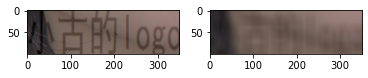

In [50]:
print(img_addwater.shape)

img_roi = img_addwater_dup[0][850:950, 260:610]
img_blur = cv2.blur(img_roi, (23,23))
plt.subplot(1, 2, 1)
plt.imshow(img_roi)
plt.subplot(1, 2, 2)
plt.imshow(img_blur)

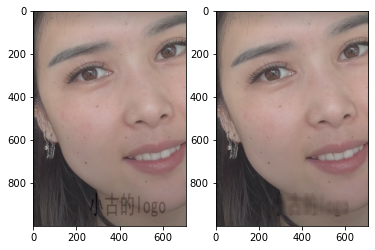

In [51]:
img_addwater_dup[0][850:950, 260:610] = img_blur
plt.subplot(1, 2, 1)
plt.imshow(img_addwater)
plt.subplot(1, 2, 2)
plt.imshow(img_addwater_dup[0])

## 2.2均值滤波 (效果最好)

(1000, 707, 3)


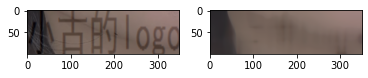

In [52]:
print(img_addwater.shape)

img_roi = img_addwater_dup[1][850:950, 260:610]
img_medianblur = cv2.medianBlur(img_roi, 41)
plt.subplot(1, 2, 1)
plt.imshow(img_roi)
plt.subplot(1, 2, 2)
plt.imshow(img_medianblur)

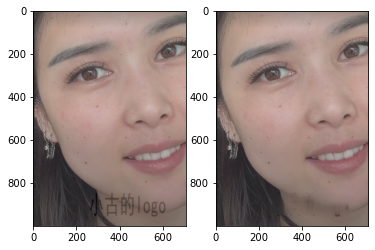

In [53]:
img_addwater_dup[1][850:950, 260:610] = img_medianblur
plt.subplot(1, 2, 1)
plt.imshow(img_addwater)
plt.subplot(1, 2, 2)
plt.imshow(img_addwater_dup[1])

### 2.3 高斯滤波(试了不同大小卷积核，对去除水印没有啥明显作用)

(1000, 707, 3)


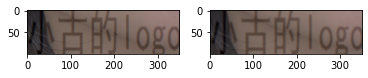

In [54]:
print(img_addwater.shape)

img_roi = img_addwater_dup[2][850:950, 260:610]
img_Gauss = cv2.GaussianBlur(img_roi, (19, 19), 1, 0)
plt.subplot(1, 2, 1)
plt.imshow(img_roi)
plt.subplot(1, 2, 2)
plt.imshow(img_Gauss)

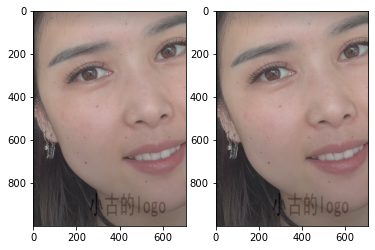

In [55]:
img_addwater_dup[2][850:950, 260:610] = img_Gauss
plt.subplot(1, 2, 1)
plt.imshow(img_addwater)
plt.subplot(1, 2, 2)
plt.imshow(img_addwater_dup[2])

### 2.4 双边滤波

(1000, 707, 3)


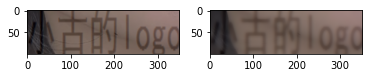

In [56]:
print(img_addwater.shape)

img_roi = img_addwater_dup[3][850:950, 260:610]
# img_bilateral = cv2.bilateralFilter(img_rgb, 15, 105, 105)
img_bilateral = cv2.bilateralFilter(img_roi, 15, 105, 105)
plt.subplot(1, 2, 1)
plt.imshow(img_roi)
plt.subplot(1, 2, 2)
plt.imshow(img_bilateral)

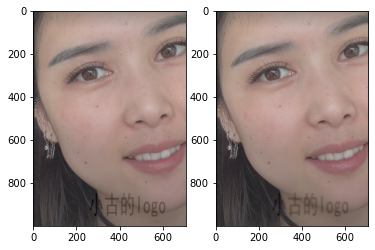

In [57]:
img_addwater_dup[3][850:950, 260:610] = img_bilateral
plt.subplot(1, 2, 1)
plt.imshow(img_addwater)
plt.subplot(1, 2, 2)
plt.imshow(img_addwater_dup[3])

# 去除水印的4中滤波方式中，本次效果最好的是中值滤波。